<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP4_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install keras==2.12.0
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.12.0

In [ ]:
# !pip install keras==2.3.1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
# from keras.utils.vis_utils import plot_model
# import visualkeras

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/df_train_limpio.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/df_test_limpio.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.layers import Dense

X = df_train.drop(['is_canceled', 'id'], axis=1)
y = df_train['is_canceled']

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=22)
# One hot encoding
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<ipython-input-21-25d7f762fe8d>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
<ipython-input-21-25d7f762fe8d>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()


In [ ]:
from tensorflow.keras import regularizers
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))

l1_factor = 0.001
l2_factor = 0.001

d_in=len(x_train.columns)
modelo_1 = keras.Sequential([
    keras.layers.Dense(128,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'), #capa entrada
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2, activation='sigmoid')]) #capa salida


modelo_l1 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform',
                       kernel_regularizer=regularizers.l1(l1_factor)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l1(l1_factor)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2, activation='sigmoid',
                       kernel_regularizer=regularizers.l1(l1_factor))
])

modelo_l2 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform',
                       kernel_regularizer=regularizers.l2(l2_factor)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l2(l2_factor)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2, activation='sigmoid',
                       kernel_regularizer=regularizers.l2(l2_factor))
])

modelo_l1_l2 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform',
                       kernel_regularizer=regularizers.l1_l2(l1=l1_factor, l2=l2_factor)),
    keras.layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l1_l2(l1=l1_factor, l2=l2_factor)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2, activation='sigmoid',
                       kernel_regularizer=regularizers.l1_l2(l1=l1_factor, l2=l2_factor))
])


In [ ]:
modelo_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               6528      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 14914 (58.26 KB)
Trainable params: 14914 (58.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo_1.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2= 0.999),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)

cant_epochs=100

historia_modelo_1=modelo_1.fit(x_train_scaled,y_train_encoder,epochs=cant_epochs,
                                         batch_size=50,verbose=False)

modelo_l1.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2= 0.999),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)


historia_modelo_l1=modelo_l1.fit(x_train_scaled,y_train_encoder,epochs=cant_epochs,
                                         batch_size=50,verbose=False)


modelo_l2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2= 0.999),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)


historia_modelo_l2=modelo_l2.fit(x_train_scaled,y_train_encoder,epochs=cant_epochs,
                                         batch_size=50,verbose=False)

modelo_l1_l2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2= 0.999),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)

cant_epochs=100

historia_modelo_l1_l2=modelo_l1_l2.fit(x_train_scaled,y_train_encoder,epochs=cant_epochs,
                                         batch_size=50,verbose=False)

In [ ]:
y_predic1 = modelo_1.predict(x_test_scaled)
y_predicl1 = modelo_l1.predict(x_test_scaled)
y_predicl2 = modelo_l2.predict(x_test_scaled)
y_predicl1_l2 = modelo_l1_l2.predict(x_test_scaled)

581/581 [==============================] - 1s 2ms/step


Modelos Dropout

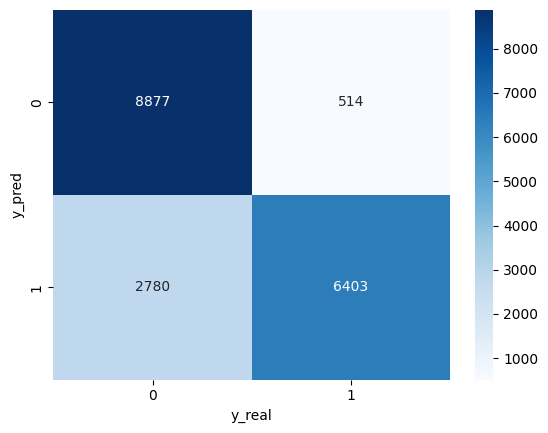

In [ ]:

y_predic_cat_1 = np.where(y_predic1>=0.7,1,0)
y_predic_cat_1= y_predic_cat_1[:, 1]

ds_validacion=pd.DataFrame(y_predic_cat_1 ,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla1=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf1=sns.heatmap(tabla1,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
modelo_1.evaluate(x_test_scaled, y_test_encoder, verbose=2)

581/581 - 1s - loss: 0.3186 - auc: 0.9353 - 1s/epoch - 2ms/step


[0.3185735046863556, 0.9352980256080627]

In [ ]:
from google.colab import files
df_test_pred = df_test.drop(['is_canceled', 'id'], axis=1)

ids = df_test['id'].copy()

df_test_scal  = scaler.transform(df_test_pred)

prediccion_dropout = modelo_1.predict(df_test_scal)
prediccion_bin_dropout = np.where(prediccion_dropout > 0.7, 1, 0).astype(int)
prediccion_bin_dropout= prediccion_bin_dropout[:, 1]


df_pred_drop = pd.DataFrame({'id': ids, 'is_canceled': prediccion_bin_dropout})
df_pred_drop.to_csv('df_pred_drop.csv', sep=',', index=False)
files.download('df_pred_drop.csv')

830/830 [==============================] - 2s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Modelo con L1

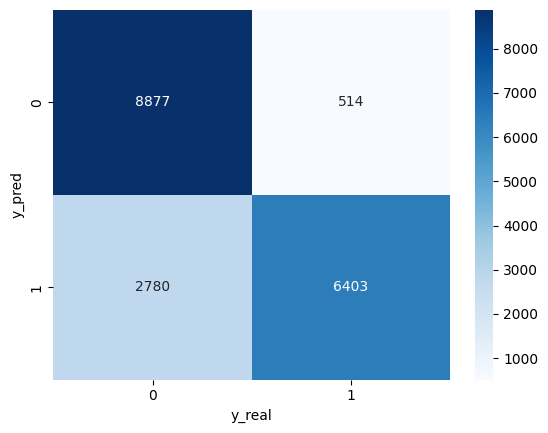

In [ ]:

y_predic_cat_l1 = np.where(y_predicl1>=0.7,1,0)
y_predic_cat_l1= y_predic_cat_l1[:, 1]

ds_validacion_l1=pd.DataFrame(y_predic_cat_1 ,y_test).reset_index()
ds_validacion_l1.columns=['y_pred','y_real']

tabla2=pd.crosstab(ds_validacion_l1.y_pred, ds_validacion_l1.y_real)
grf2=sns.heatmap(tabla2,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
modelo_l1.evaluate(x_test_scaled, y_test_encoder, verbose=2)

581/581 - 2s - loss: 0.4292 - auc: 0.9202 - 2s/epoch - 3ms/step


[0.4291686713695526, 0.9201831221580505]

In [ ]:
prediccion_l1 = modelo_l1.predict(df_test_scal)
prediccion_bin_l1 = np.where(prediccion_l1 > 0.7, 1, 0).astype(int)
prediccion_bin_l1 = prediccion_bin_l1[:, 1]


df_pred_l1 = pd.DataFrame({'id': ids, 'is_canceled': prediccion_bin_l1})
df_pred_l1.to_csv('df_pred_l1.csv', sep=',', index=False)
files.download('df_pred_l1.csv')

830/830 [==============================] - 1s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Modelo con L2

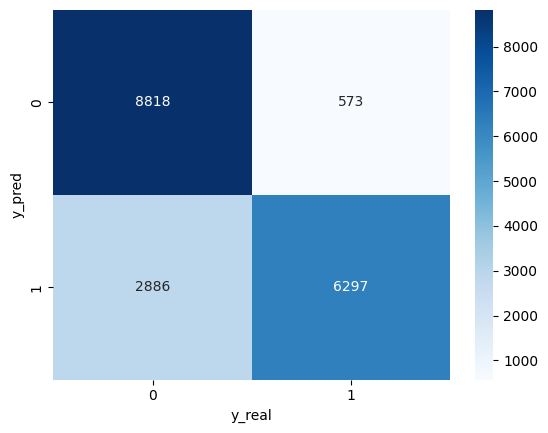

In [ ]:

y_predic_cat_l2 = np.where(y_predicl2>=0.7,1,0)
y_predic_cat_l2= y_predic_cat_l2[:, 1]

ds_validacion_l2=pd.DataFrame(y_predic_cat_l2 ,y_test).reset_index()
ds_validacion_l2.columns=['y_pred','y_real']

tabla3=pd.crosstab(ds_validacion_l2.y_pred, ds_validacion_l2.y_real)
grf3=sns.heatmap(tabla3,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
modelo_l2.evaluate(x_test_scaled, y_test_encoder, verbose=2)

581/581 - 1s - loss: 0.3662 - auc: 0.9275 - 1s/epoch - 2ms/step


[0.36615464091300964, 0.9275435209274292]

In [ ]:
prediccion_l2 = modelo_l2.predict(df_test_scal)
prediccion_bin_l2 = np.where(prediccion_l2 > 0.7, 1, 0).astype(int)
prediccion_bin_l2 = prediccion_bin_l2[:, 1]


df_pred_l2 = pd.DataFrame({'id': ids, 'is_canceled': prediccion_bin_l2})
df_pred_l2.to_csv('df_pred_l2.csv', sep=',', index=False)
files.download('df_pred_l2.csv')

830/830 [==============================] - 2s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Modelo con L1 y L2

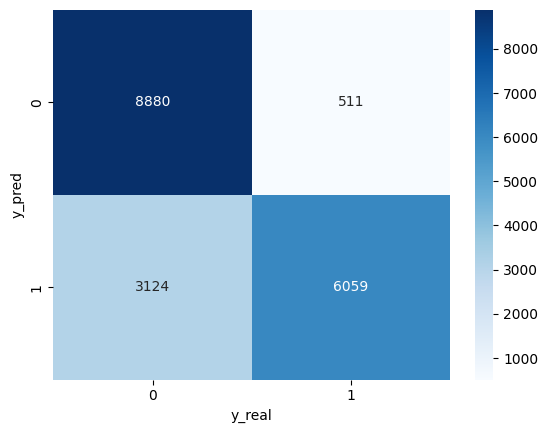

In [ ]:
y_predic_cat_l1_l2 = np.where(y_predicl1_l2>=0.7,1,0)
y_predic_cat_l1_l2= y_predic_cat_l1_l2[:, 1]

ds_validacion_l1_l2=pd.DataFrame(y_predic_cat_l1_l2 ,y_test).reset_index()
ds_validacion_l1_l2.columns=['y_pred','y_real']

tabla4=pd.crosstab(ds_validacion_l1_l2.y_pred, ds_validacion_l1_l2.y_real)
grf4=sns.heatmap(tabla4,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
modelo_l1_l2.evaluate(x_test_scaled, y_test_encoder, verbose=2)

581/581 - 1s - loss: 0.4138 - auc: 0.9212 - 1s/epoch - 2ms/step


[0.41379863023757935, 0.9212386608123779]

In [ ]:

prediccion_l1_l2 = modelo_l1_l2.predict(df_test_scal)
prediccion_bin_l1_l2 = np.where(prediccion_l1_l2 > 0.7, 1, 0).astype(int)
prediccion_bin_l1_l2 = prediccion_bin_l1_l2[:, 1]

df_pred_l1_l2= pd.DataFrame({'id': ids, 'is_canceled': prediccion_bin_l1_l2})
df_pred_l1_l2.to_csv('df_pred_l1_l2.csv', sep=',', index=False)
files.download('df_pred_l1_l2.csv')

830/830 [==============================] - 2s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras import Sequential, layers, optimizers
from keras.metrics import AUC

# Función para crear y entrenar un modelo con parámetros específicos
def train_model(epochs, batch_size):
    modelo = Sequential([
        layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(2, activation='sigmoid')
    ])

    modelo.compile(
        optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.0, beta_2=0.999),
        loss='binary_crossentropy',
        metrics=[AUC(name='auc')],
    )

    history = modelo.fit(x_train_scaled, y_train_encoder, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)
    return history.history['val_auc'][-1]


# Definir los parámetros para la búsqueda
epochs_options = [50,100]
batches_options = [5,10]

best_auc = 0
best_params = {}

# Realizar la búsqueda manualmente
for epochs in epochs_options:
    for batch_size in batches_options:
        auc = train_model(epochs, batch_size)
        if auc > best_auc:
            best_auc = auc
            best_params = {'epochs': epochs, 'batch_size': batch_size}



In [ ]:
print(f"Mejor AUC: {best_auc} usando {best_params}")

Mejor AUC: 0.932507336139679 usando {'epochs': 100, 'batch_size': 20}

In [ ]:
modelo_2 = keras.Sequential([
        layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(2, activation='sigmoid')
    ])

modelo_2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2= 0.999),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)

historia_modelo_2=modelo_2.fit(x_train_scaled,y_train_encoder,epochs=100,
                                         batch_size=20,verbose=False)

In [ ]:
y_predic2 = modelo_2.predict(x_test_scaled)

In [ ]:
y_predic_cat_2 = np.where(y_predic2>=0.7,1,0)
y_predic_cat_2= y_predic_cat_2[:, 1]

ds_validacion2=pd.DataFrame(y_predic_cat_2 ,y_test).reset_index()
ds_validacion2.columns=['y_pred','y_real']

tabla2=pd.crosstab(ds_validacion2.y_pred, ds_validacion2.y_real)
grf2=sns.heatmap(tabla2,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
modelo_2.evaluate(x_test_scaled, y_test_encoder, verbose=2)

In [ ]:


prediccion2 = modelo_2.predict(df_test_scal)
prediccion_bin2 = np.where(prediccion2 > 0.7, 1, 0).astype(int)
prediccion_bin2 = prediccion_bin2[:, 1]


df_pred2 = pd.DataFrame({'id': ids, 'is_canceled': prediccion_bin2})
df_pred2.to_csv('df_pred.csv', sep=',', index=False)
files.download('df_pred.csv')